In [142]:
import numpy as np
import matplotlib.pyplot as plt
import time

## 1 - Mise en Place

Géneration du Probléme-Jouet

In [143]:
def quadratic_problem2d(Lambda):
    A1 = np.random.rand(2,2)
    Q,R = np.linalg.qr(A1)
    L = np.diag(Lambda)
    P = Q.T@L@Q
    # with P definite positive
    q = np.random.rand(2)
    r = np.random.rand(1) 
    return P,q,r

In [144]:
#from method_optim import gradient_descent
#from step_optim import backtrack

def create_problem(m,n,scale,x0):
    #centered a
    A = scale*(np.random.rand(n,m)-.5)
    b = x0@A + 5*scale*np.random.rand(m)
    c = (np.random.rand(n)-.5)
    return A,b,c

Fonction de Coût

In [145]:
def cost(x):
    
    diff = b - A.T @ x
    
    if np.any(diff <= 0):
        return np.inf

    cout = c.T @ x - np.sum(np.log(diff))
    
    return cout

Fonction de Gradient

In [146]:
def gradient(x):

    diff = b - A.T @ x
    
    if np.any(diff <= 0):
        return np.inf

    grad = c + A @ (1 / diff)
    
    return grad

Backtracking

In [147]:
def Backtracking(fonc, grad, d, x0):
    sig = 1.0
    c = 1e-4
    rho = 0.5
    
    while fonc(x0 + sig*d) > fonc(x0) + c*sig*grad(x0).T @ d:
        sig = rho*sig
    
    sigk = sig
    
    return sigk   

In [148]:
def GoldenSearch(Fonc, x0, direction):
    a = 0
    b = 2
    Ep = 1e-12
    phi = (1+np.sqrt(5))/2
    iter_count = 0
    max_iter = 100
    
    # Lambda function to evaluate the cost function for a given step size sigma
    f = lambda sigma: Fonc(x0 + sigma * direction)
    
    c = a + (b-a)/(phi+1)
    d = b - (b-a)/(phi+1)
       
    while b - a > Ep and iter_count < max_iter:
        if f(c) >= f(d):
            a = c
            c = d
            d = b - (b-a)/(phi+1) 
        else: 
            b = d
            d = c
            c = a + (b-a)/(phi+1) 
        iter_count += 1  
           
    sig = (a + b) / 2       
         
    return sig

Méthode de Descente de Gradient

In [149]:
def Gradient_Descent(x0,cost,gradient,step, met):
    n = np.linalg.norm(gradient(x0))
    xlist = [x0]
    flist = [cost(x0)]
    nlist = [n]
    k = 0
    
    while n >= 1e-6 and k < 100000:
        d = - gradient(x0)
        
        if met == 'Pas Constant':
            sigma = step
        elif met == 'Pas Optimal':
            sigma = GoldenSearch(cost, x0, d)
        else:
            sigma = Backtracking(cost, gradient, d, x0)
        
        x0 = x0 + sigma*d
        k = k+1
        xlist.append(x0)
        flist.append(cost(x0))
        nlist.append(n)
        n = np.linalg.norm(cost(xlist[-1])- cost(xlist[-2]) )
        
    return xlist,flist,nlist

Visualisation des Résultats

Pas Constant
[array([1, 1]), array([0.99269561, 1.00234695]), array([0.98672217, 1.00363162]), array([0.98161498, 1.00433799]), array([0.97716289, 1.00467633]), array([0.97324389, 1.00476452]), array([0.96977765, 1.00467817]), array([0.9667066, 1.00447  ]), array([0.96398675, 1.00417878]), array([0.96158268, 1.00383395]), array([0.95946454, 1.00345821]), array([0.9576062 , 1.00306916]), array([0.95598399, 1.00268027]), array([0.95457589, 1.00230164]), array([0.9533611 , 1.00194053]), array([0.95231975, 1.00160188]), array([0.95143284, 1.00128867]), array([0.9506823 , 1.00100232]), array([0.95005109, 1.00074308]), array([0.94952336, 1.00051025]), array([0.94908458, 1.00030253]), array([0.94872158, 1.00011822]), array([0.94842266, 0.99995541]), array([0.9481775 , 0.99981207]), array([0.94797717, 0.99968623]), array([0.947814  , 0.99957598]), array([0.94768148, 0.99947954]), array([0.94757412, 0.99939527]), array([0.94748733, 0.9993217 ]), array([0.94741732, 0.9992575 ]), array([0.9473609

c:\Users\ferna\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.canvas.print_figure(bytes_io, **kw)


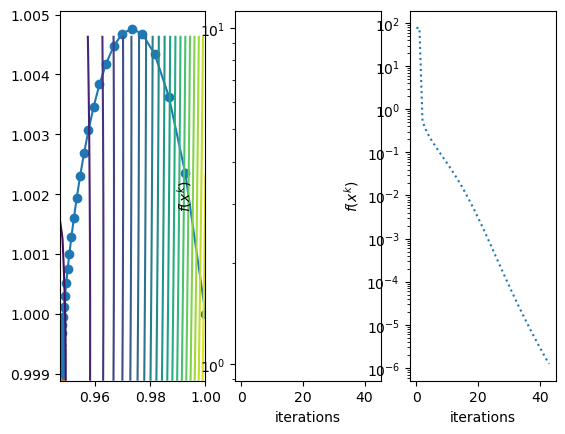

Pas Optimal
[array([1, 1]), array([-2775.10334855, -2432.47951364]), array([-inf, -inf])]
[-639.8372147443876, inf, inf]
Temps d'execution (secondes) for test n° 2 :  0.008808374404907227


C:\Users\ferna\AppData\Local\Temp\ipykernel_13692\2017515770.py:3: RuntimeWarning: invalid value encountered in matmul
  diff = b - A.T @ x
C:\Users\ferna\AppData\Local\Temp\ipykernel_13692\1644613463.py:44: RuntimeWarning: invalid value encountered in scalar divide
  xgrid = np.arange(ax,bx,(bx-ax)/50)


ValueError: arange: cannot compute length

c:\Users\ferna\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  func(*args, **kwargs)


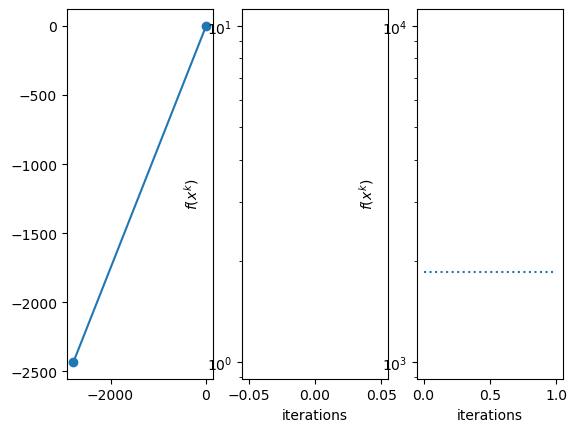

In [150]:
# Definitions de differents Méthodes
MET = np.array(['Pas Constant', 'Pas Optimal', 'Backtrack'])

# Boucle pour chaque Méthode
for met in MET:
    print(met)
    x0 = np.array((1,1))
    A,b,c = create_problem(500,2,2,x0) 

    #grid
    ax= x0[0]
    bx = x0[0]
    ay= x0[1]
    by = x0[1]

    start_time = time.time()
    xlist,flist,nlist =  Gradient_Descent(x0,cost,gradient,1e-4, met)
    print(xlist)
    print(flist)
    RunTime = (time.time() - start_time) # Calcul du temps d'execution
    print("Temps d'execution (secondes) for test n°", test+1,  ": ", RunTime)
    xlist = np.asarray(xlist)
    
    fig = plt.figure(1) 
    plt.subplot(1,3,1)
    plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
    
    ax = np.min((xlist[:,0].min(),ax))#-.1
    bx = np.max((xlist[:,0].max(),bx))#+.1
    ay = np.min((xlist[:,1].min(),ay))#-.1
    by = np.max((xlist[:,1].max(),by))#+.1
    
    plt.subplot(1,3,2)
    plt.semilogy(range(len(flist)),flist)
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    plt.subplot(1,3,3)
    plt.semilogy(nlist,':')
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
        
    #    
    xgrid = np.arange(ax,bx,(bx-ax)/50)
    ygrid = np.arange(ay,by,(by-ay)/50)
    X, Y = np.meshgrid(xgrid, ygrid)
    Z = np.zeros(X.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

    plt.subplot(1,3,1)
    plt.contour(X, Y, Z,21)

    plt.plot(xlist[-1,0], xlist[-1,1],'*',label='points')
    plt.show()